# Linear Regression using PSO

1. Initialise particles in the search space at random.
2. Assign random initial velocities for each particle.
3. Evaluate the fitness of each particle according a user defined objective function.
4. Claculate the new velocities for each particle.
5. Move the particles.
6. Repeat steps 3 to 5 until a predefined stopping criterion is setisfied.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
NUM_PARTIALS = 2
RANGE_NUMBER = np.arange(-5, 5, 0.1)

## Linear Regression

$ y=mx+c $

In [3]:
m_sol = random.random() * 4 - 2
c_sol = random.random() * 4 - 2
print(f"y = {m_sol:.3f}x + {c_sol:.3f}")

y = 1.642x + -0.655


## Fitness Score

Using `Mean Square Error (MSE)` in the equation below:

<!-- $ MSE = 1/n $ -->
$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

- $n$ is the number of observations.
- $y_i$ represents the actual values of the observations.
- $\hat{y}_i$ represents the predicted values of the observations.

In [4]:
def fitness_score(m_sol, c_sol, m, c):
    error = 0
    for x in RANGE_NUMBER:
        y_hat = m * x + c
        y_sol = m_sol * x + c_sol
        error += (y_sol - y_hat)**2
    return error / len(RANGE_NUMBER)

## Swarm Search Formulas 

### Velocity calculation

$$ \mathbf{v}_{i}(t+1) = w \cdot \mathbf{v}_{i}(t) + c_1 \cdot r_1 \cdot (\mathbf{p}_{i}(t) - \mathbf{x}_{i}(t)) + c_2 \cdot r_2 \cdot (\mathbf{p}_{\text{gbest}}(t) - \mathbf{x}_{i}(t)) $$


### Position update

$$ \mathbf{x}_{i}(t+1) = \mathbf{x}_{i}(t) + \mathbf{v}_{i}(t+1) $$


In these formulas:

- $\mathbf{x}_{i}(t)$ represents the position of particle **i** at time **t**.
- $\mathbf{v}_{i}(t)$ represents the velocity of particle **i** at time **t**.
- $\mathbf{p}_{i}(t)$ represents the best position (personal best) of particle **i** at time **t**.
- $\mathbf{p}_{gbest}(t)$ represents the best position (global best) among all particles up to time **t**.
- $w$ is the inertia weight factor.
- $c_1 and c_2$ are the cognitive and social acceleration coefficients, respectively.
- $r_1 and r_2$ are random values sampled from the uniform distribution in the range [0, 1].

In [5]:
class Bee:
    C1 = 0.02
    C2 = 0.002
    INERTIA = 0.6

    def __init__(self, m_sol, c_sol, num_partial):
        self.x = np.array([random.random() * 10 - 5   for _ in range(num_partial)])
        self.v = np.array([random.random() / 10 - 0.5 for _ in range(num_partial)])
        self.p = np.copy(self.x)
        self.set(m_sol, c_sol)

    def set(self, m_sol, c_sol):
        self.m_sol = m_sol
        self.c_sol = c_sol

    def move(self, g):
        local_best  = self.C1 * random.random() * (self.p - self.x)
        global_best = self.C2 * random.random() * (g - self.x)

        self.v = self.v * self.INERTIA + local_best + global_best
        self.x += self.v
        if self.fitness() <= self.fitness(self.p):
            self.p = np.copy(self.x)

    def fitness(self, g=None):
        if g is None:
            m = self.x[0]
            c = self.x[1]
        else:
            m = g[0]
            c = g[1]

        # xs = np.arange(-4, 4, 0.1)
        xs = RANGE_NUMBER
        y_hat = np.array([m * xs[i] + c for i in range(xs.shape[0])])
        y_sol = np.array([self.m_sol * xs[i] + self.c_sol for i in range(xs.shape[0])])
        return (y_hat - y_sol).dot((y_hat - y_sol).T)

    def __str__(self):
        return f"x = {self.x}, p = {self.p}, fitness = {self.fitness()}"

In [6]:
def show_bees(bees, g):
    for bee in bees:
        print(f"Position: {bee.x}\tFitness: {bee.fitness():.5f}")

    print("Global best")
    print(f"Position: {g}\tFitness: {bee.fitness(g):.5f}\n")


def update_g(bees, g):
    new_global = np.copy(g)
    for bee in bees:
        if bee.fitness() <= bee.fitness(new_global):
            new_global = np.copy(bee.x)
    return new_global

Iteration 0
Position: [-0.55809132 -0.63169038]	Fitness: 4036.25395
Position: [-3.06793618  0.85487761]	Fitness: 18791.55924
Position: [ 4.6210936  -2.74038416]	Fitness: 7892.77540
Position: [2.49399618 1.6413382 ]	Fitness: 1112.21029
Position: [-0.74641049 -2.01400195]	Fitness: 4908.31537
Position: [-1.87375407 -2.66624989]	Fitness: 10638.33377
Position: [0.14558189 4.20419848]	Fitness: 4300.92086
Position: [-3.99096044 -2.16196763]	Fitness: 26592.54231
Position: [2.3365633  0.96223101]	Fitness: 651.94769
Position: [-4.80965429  3.69872127]	Fitness: 36873.20143
Position: [-2.97871201 -0.32701408]	Fitness: 17824.48615
Position: [ 4.72923292 -0.55227242]	Fitness: 7940.27162
Position: [4.43284417 4.103952  ]	Fitness: 8622.15959
Position: [-3.88018681  3.99368231]	Fitness: 27837.76471
Position: [-3.90138199  1.87059234]	Fitness: 26393.49372
Position: [ 0.26254185 -2.98202623]	Fitness: 2096.34578
Position: [-0.85829791 -0.57594018]	Fitness: 5214.59314
Position: [-0.24898426 -4.25998468]	Fi

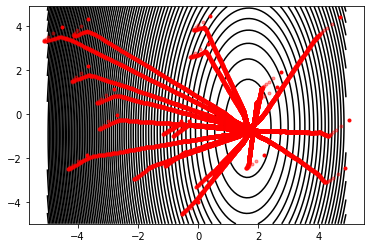

In [7]:
bees = []
for i in range(20):
    bees.append(Bee(m_sol, c_sol, NUM_PARTIALS))

m = RANGE_NUMBER
c = RANGE_NUMBER
m, c = np.meshgrid(m, c)
err = fitness_score(m_sol, c_sol, m, c)

plt.figure()
plt.contour(m, c, err, levels=80, colors='k')

for bee in bees:
    plt.plot(bee.x[0], bee.x[1], 'r.')

g = update_g(bees, bees[0].x)

for i in range(3000):
    g = update_g(bees, g)
    if bees[0].fitness(g) <= 1e-6:
        print('Iteration', i, '*** ', end='')
        print(g)
        break
    for b in bees:
        b.move(g)
    if i % 500 == 0:
        print('Iteration', i)
        show_bees(bees, g)
    for bee in bees:
        plt.plot(bee.x[0], bee.x[1], 'r.', alpha=0.4)

show_bees(bees, g)

## Error Surface

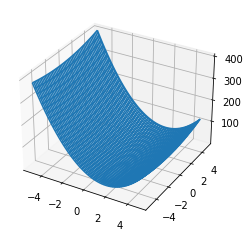

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(m, c, err)
plt.show()

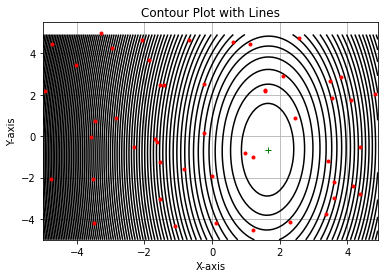

In [10]:
plt.figure()
plt.contour(m, c, err, levels=80, colors='k')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Contour Plot with Lines')
plt.grid(True)

bees = []
for i in range(50):
    bees.append(Bee(m_sol, c_sol, NUM_PARTIALS))

for bee in bees:
    plt.plot(bee.x[0], bee.x[1], 'r.')

plt.plot(g[0], g[1], 'g+')
plt.show()

# End of the Notebook